<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%A1%D0%9B%D0%90%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import torch as th
import copy
import time

In [2]:
#A = th.tensor([[3, 2, -5],[2, -1, 3],[1, 2, -1]], dtype=th.float32)
#b = th.tensor([-1, 13, 9], dtype=th.float32)

In [45]:
A = th.tensor([[10, -3, 2],[3, -10, -2],[2, -3, 10]], dtype=th.float32)
b = th.tensor([10, -23, 26], dtype=th.float32)

In [133]:
t1 = time.time()
solution = th.linalg.solve(A, b)
t2 = time.time()
print(t2-t1)

0.0006084442138671875


In [5]:
solution

tensor([1.0000, 2.0000, 3.0000])

In [6]:
A@solution

tensor([ 10.0000, -23.0000,  26.0000])

In [127]:
class SolutionLS():
    def __init__(self, A:th.Tensor,
                 b:th.Tensor,
                 eps: float = 0.01,
                 max_iter: int = 10000):
        self.A = A
        self.b = b
        self.eps = eps
    def stopping_criteria(self,
                          new:th.Tensor,
                          previos:th.Tensor)->bool:
        return abs(new-previos).max()>=self.eps
    def jacobi_method(self):
        x_prev = th.zeros(len(self.b))
        x_new = th.ones(len(self.b))
        num_iterations = 0
        while self.stopping_criteria(x_new, x_prev):
            num_iterations += 1
            x_prev = x_new.clone().detach()
            for i in range(len(self.b)):
                s = 0
                for j in range(len(self.b)):
                    if not j==i:
                        s += self.A[i][j]*x_prev[j]
                x_new[i] = (self.b[i]-s)/(self.A[i][i])
        return x_new, num_iterations
    def gradient_descent(self, lr = 0.01):
        x_prev = th.zeros(len(self.b))
        x_new = th.ones(len(self.b))
        num_iterations = 0
        while self.stopping_criteria(x_new, x_prev):
            num_iterations+=1
            x_prev = x_new.clone().detach()
            b_pred = self.A @ x_prev
            loss = sum((self.b-b_pred)**2)/len(b_pred)
            gradient = 2/len(b_pred)*(self.b-b_pred) @ - self.A
            x_new -= lr*gradient
        return x_new, num_iterations
    def another_gradient_desc(self, lr = 0.01):
        x_prev = th.zeros(len(self.b))
        x_new = th.ones(len(self.b))
        num_iterations = 0
        while self.stopping_criteria(x_new, x_prev):
            num_iterations+=1
            x_prev = x_new.clone().detach()
            b_pred = self.A @ x_prev
            r = b_pred - self.b
            x_new = x_prev - ((self.A.adjoint()@r).norm()**2) / (self.A @ self.A.adjoint()@r).norm()**2 * self.A.adjoint() @ r
        return x_new, num_iterations
    def iter_parameters(self, rk: th.Tensor, r0: th.Tensor):
        matrix_A = th.tensor([
                [(rk-r0).norm()**2, (self.A.adjoint()@rk).norm()**2],
                [(self.A.adjoint()@rk).norm()**2, (self.A@self.A.adjoint()@rk).norm()**2]])
        vector_b = th.tensor([0, (self.A.adjoint()@rk).norm()**2])
        alpha, betta = th.linalg.solve(matrix_A, vector_b)
        return alpha, betta
    def two_step_gradient_desc(self):
        """x_prev1, x_prev2, x_new"""
        x_prev1 = th.ones(len(self.b))
        r0 = self.A@x_prev1 - self.b
        x_prev2 = x_prev1 - ((self.A.adjoint()@r0).norm()**2) / (self.A @ self.A.adjoint()@r0).norm()**2 * self.A.adjoint() @ r0
        rk = self.A@x_prev2 - self.b
        alpha, betta = self.iter_parameters(rk, r0)
        x_new = x_prev2 - alpha*(x_prev2 - x_prev1) - betta*(self.A.adjoint() @ rk)
        num_iterations = 0
        while self.stopping_criteria(x_new, x_prev2):
            num_iterations += 1
            x_prev1 = x_prev2.clone().detach()
            r0 = self.A @ x_prev1 - self.b
            x_prev2 = x_new.clone().detach()
            rk = self.A@x_prev2 - self.b
            alpha, betta = self.iter_parameters(rk, r0)
            x_new = x_prev2 - alpha*(x_prev2 - x_prev1) - betta*(self.A.adjoint() @ rk)
        return x_new, num_iterations

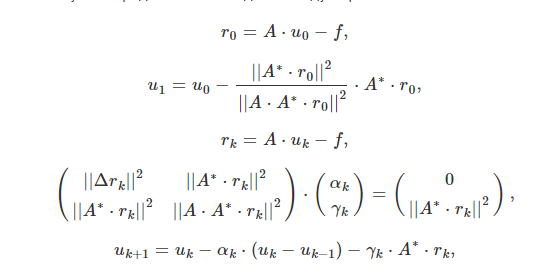

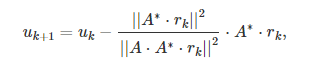

In [128]:
f = SolutionLS(A, b, eps = 0.0001)

In [129]:
t1 = time.time()
f.two_step_gradient_desc()
t2 = time.time()
print(t2-t1)

0.0063817501068115234


In [112]:
f.another_gradient_desc()

(tensor([1.0000, 1.9999, 3.0000]), 13)

In [113]:
f.gradient_descent()

(tensor([0.9998, 1.9998, 3.0001]), 17)

In [114]:
f.jacobi_method()

(tensor([1.0000, 2.0000, 3.0000]), 9)

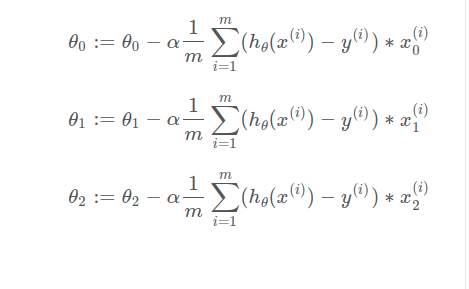

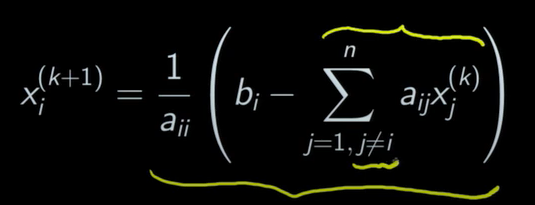

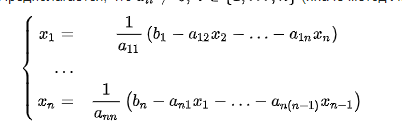

In [103]:
t1 = time.time()

In [104]:
t1

1696856335.5598483